In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("/kaggle/input/p1-dataset/datos.csv")
df.head()

,nombre,apellido,horas_dedicadas,calificaciones_obtenida
0,Sofía Sánchez,Rodríguez,52,45.0
1,Luis Romero,Romero,2,NaN
2,Juan Díaz,López,170,100.0
3,Miguel Hernández,Álvarez,42,NaN
4,Juan González,Díaz,125,70.0


### 1 
_El mínimo, máximo, media y desviación estándar tanto para el número de
horas dedicadas como para las calificaciones obtenidas._

In [3]:
hrs_desc = df['horas_dedicadas'].describe()
cal_desc = df['calificaciones_obtenida'].describe()
print(f"Horas dedicadas: \nMax:\t {hrs_desc['max']}\nMedia:\t {hrs_desc['mean']}\nStd:\t {hrs_desc['std']}\n")
print(f"Calificaciones obtenidas: \nMax:\t {cal_desc['max']}\nMedia:\t {cal_desc['mean']}\nStd:\t {cal_desc['std']}")

Horas dedicadas: 
Max:	 178.0
Media:	 99.4
Std:	 58.129075974801204

Calificaciones obtenidas: 
Max:	 100.0
Media:	 64.05555555555556
Std:	 33.539217119177366


In [4]:
# Podríamos estimar valores con la media y la descviación estándar
df = df.fillna(0)
df

,nombre,apellido,horas_dedicadas,calificaciones_obtenida
0,Sofía Sánchez,Rodríguez,52,45.0
1,Luis Romero,Romero,2,0.0
2,Juan Díaz,López,170,100.0
3,Miguel Hernández,Álvarez,42,0.0
4,Juan González,Díaz,125,70.0
5,Juan García,Fernández,47,40.0
6,Luis Romero,López,149,100.0
7,Miguel Fernández,Romero,162,80.0
8,Carmen Pérez,Álvarez,139,45.0
9,Juan Rodríguez,Romero,18,30.0


### 2
_Lleva a cabo un análisis de regresión lineal utilizando estos datos y presenta un gráfico que muestre el modelo de regresión junto con los datos
originales._

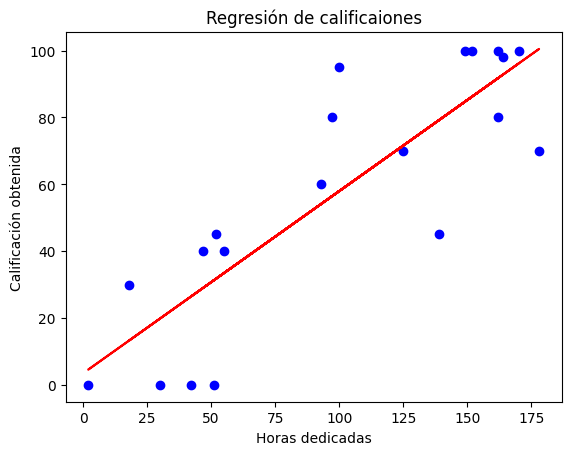

In [5]:
X = df['horas_dedicadas'].values.reshape(-1,1)
y = df['calificaciones_obtenida'].values 
model = LinearRegression()
model.fit(X, y)
preds = model.predict(X)

plt.scatter(X, y, color='blue')
plt.plot(X, preds, color='red')
plt.title('Regresión de calificaiones')
plt.xlabel('Horas dedicadas')
plt.ylabel('Calificación obtenida')
plt.show()

### 3
_Utiliza el modelo de regresión para realizar una predicción de la calificación
de un estudiante que hubiera dedicado n horas en el semestre a la materia
(donde $n$ es la suma de los dígitos de su número de cuenta módulo 50)._

In [6]:
n = 40 % 50
pred = model.predict(np.array([[n]]))
print(f"Predicción para {n}: {pred.item():.2}")

Predicción para 40: 2.5e+01


### 4
_Investiga métodos para evaluar la bondad de ajuste de tu modelo y determinar cuán efectivamente explica el comportamiento de los datos._

Algunos métodos para estimar la bondad de ajuste de un modelo de regresión lineal son:
- RMSE: es una medida absoluta de ajuste. Representa la raíz cuadrada de la distancia cuadrada promedio entre el valor real y el predicho. Usualmente es la métrica más habitual para calcular el ajuste del modelo y se define por la fórmula: $$RMSE = \sqrt{\frac{1}{n}\sum_{j=1}^n (y_j - \hat{y}_j)^2}$$
- MAE: es el error absoluto medio, que consta de tomar el promedio del valor absoluto de la distancia de los valores reales respecto a los predichos. $$\frac{1}{n}\sum_{j=1}^n |y_j - \hat{y}_j|$$
- R2: indica la bondad del modelo, mostrando que las variables independientes seleccionadas explican la variabilidad de las dependientes. Está en el rango $[0,1]$, donde $0$ representa un modelo no mejora la predicción sobre el modelo medio y $1$ indica una predicción perfecta. $$R^2 = 1- 
\frac{\sum_j (y_j - \hat{y}_j)^2}{\sum_j (\hat{y}_j - y_j)^2}$$

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

rmse = mean_squared_error(y, preds)
r2   = r2_score(y, preds)
print(f"RMSE:\t {rmse}\nR2:\t {r2}")

RMSE:	 372.0000306849759
R2:	 0.7193358137770824
